# Interactive Camera Analysis for RenderMe360 s3_all

This notebook provides interactive tools for exploring camera configurations and testing different subset selections.

In [1]:
# Import required libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json
from IPython.display import display, Image, HTML
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

# Add script directory to path
sys.path.append('/ssd2/zhuoyuan/renderme360_temp/download_all/process_data_scripts')
from analyze_s3_cameras_dynamic import DynamicCameraAnalyzer

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load and Analyze Camera Data

In [2]:
# Define subject directories
base_dir = Path('/ssd2/zhuoyuan/renderme360_temp/download_all/subjects')
subjects = ['0018', '0019', '0026']
subject_dirs = [base_dir / subj for subj in subjects]

# Create analyzer
print("Analyzing camera data...")
analyzer = DynamicCameraAnalyzer(subject_dirs)

# Display summary
print(f"\nAnalysis complete!")
print(f"Subjects analyzed: {len(analyzer.subjects_data)}")
print(f"Common cameras across all subjects: {len(analyzer.common_cameras)}")
print(f"\nCommon camera IDs: {analyzer.common_cameras}")

Analyzing camera data...
Analyzing subject 0018...
Analyzing subject 0019...
Analyzing subject 0026...

Analysis complete!
Subjects analyzed: 3
Common cameras across all subjects: 38

Common camera IDs: [0, 1, 3, 4, 5, 7, 9, 11, 13, 15, 16, 17, 19, 20, 21, 23, 24, 25, 27, 28, 29, 31, 32, 33, 35, 37, 39, 40, 41, 43, 45, 47, 48, 49, 53, 55, 57, 59]


## 2. Camera Position Statistics

In [3]:
# Get metrics from first subject
subject_id = list(analyzer.subjects_data.keys())[0]
metrics = analyzer.subjects_data[subject_id]['metrics']

# Create DataFrame for easier analysis
metrics_df = pd.DataFrame([
    {
        'Camera ID': cam_id,
        'X (m)': m['position'][0],
        'Y (m)': m['position'][1],
        'Z (m)': m['position'][2],
        'Distance (m)': m['distance'],
        'Azimuth (°)': m['azimuth_deg'],
        'Elevation (°)': m['elevation_deg']
    }
    for cam_id, m in metrics.items()
])

# Display statistics
print("Camera Position Statistics:")
print("="*50)
display(metrics_df.describe())

# Show first few cameras
print("\nFirst 10 cameras:")
display(metrics_df.head(10))

Camera Position Statistics:


,Camera ID,X (m),Y (m),Z (m),Distance (m),Azimuth (°),Elevation (°)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.500000,-0.021602,0.557478,0.051118,1.345108,44.711642,3.205596
std,17.464249,0.833156,0.444399,0.812897,0.177880,102.568310,41.510329
min,0.000000,-1.269941,-0.057627,-1.253697,1.115179,-179.941259,-80.548944
25%,14.750000,-0.847469,0.001161,-0.728488,1.166554,0.287545,-36.430092
50%,29.500000,-0.174554,0.562881,-0.006350,1.375823,54.637272,-0.231339
75%,44.250000,0.819369,1.124791,0.799998,1.544355,127.826698,36.709404
max,59.000000,1.210798,1.160690,1.260317,1.618438,179.644330,80.102869



First 10 cameras:


,Camera ID,X (m),Y (m),Z (m),Distance (m),Azimuth (°),Elevation (°)
0,0,-0.192661,1.125285,-1.084462,1.574625,99.715474,-43.528207
1,1,-0.216037,0.563499,-1.253697,1.391388,110.976102,-64.295215
2,2,-0.187025,0.001161,-1.123532,1.138993,179.644330,-80.548944
3,3,-0.551863,1.147231,-0.962595,1.596021,115.689357,-37.093831
4,4,-0.631072,0.562263,-1.097315,1.385096,138.300079,-52.394396
5,5,-0.565725,-0.018061,-0.988853,1.139386,-178.171454,-60.213445
6,6,-0.843332,1.143768,-0.723266,1.594531,126.402394,-26.974369
7,7,-0.973327,0.566628,-0.824978,1.396073,149.793925,-36.222852
8,8,-0.890169,-0.057627,-0.730676,1.153087,-176.295999,-39.321404
9,9,-1.032394,1.133538,-0.379407,1.579460,132.326351,-13.899124


## 3. Interactive 3D Camera Visualization

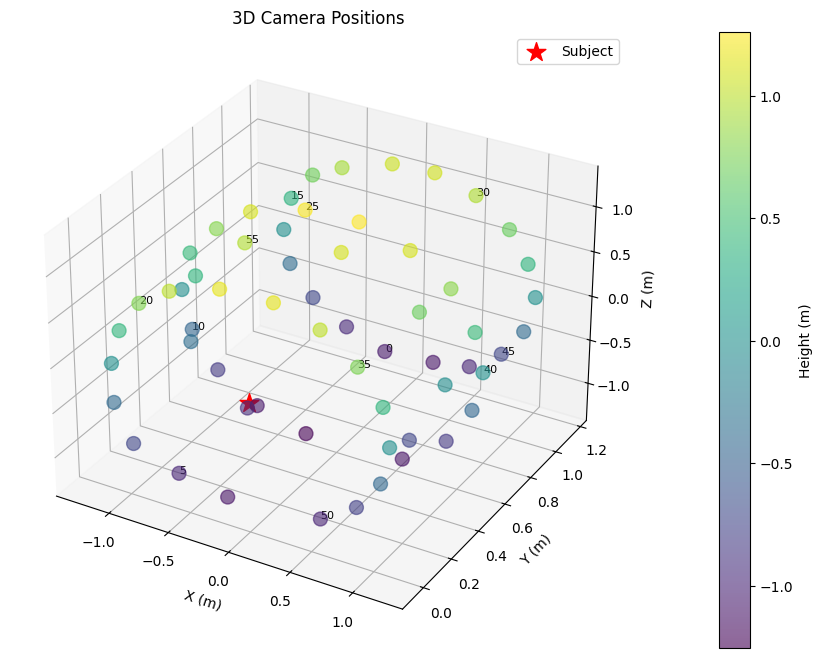

In [4]:
# Use inline plotting instead of widget
%matplotlib inline

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Get positions
positions = np.array([metrics[cam_id]['position'] for cam_id in sorted(metrics.keys())])
cam_ids = sorted(metrics.keys())

# Plot cameras
scatter = ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2],
                    c=positions[:, 2], cmap='viridis', s=100, alpha=0.6)

# Add labels for a subset of cameras to avoid clutter
for i, cam_id in enumerate(cam_ids[::5]):  # Show every 5th camera label
    idx = cam_ids.index(cam_id)
    ax.text(positions[idx, 0], positions[idx, 1], positions[idx, 2],
            str(cam_id), fontsize=8)

# Add subject at origin
ax.scatter([0], [0], [0], color='red', s=200, marker='*', label='Subject')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Camera Positions')
ax.legend()

plt.colorbar(scatter, ax=ax, label='Height (m)', pad=0.1)
plt.show()

## 4. Coverage Gap Analysis

Coverage Gap Analysis:
Average gap: 6.0°
Ideal gap for 60 cameras: 6.0°

Largest gaps:


,from_cam,to_cam,gap_degrees
0,26,50,175.063794
1,29,58,23.329355
2,53,2,22.741934
3,51,24,17.118415
4,0,1,11.260628
5,28,27,10.365615
6,45,30,10.161992
7,21,18,9.874182
8,34,49,8.312285
9,55,19,7.460802


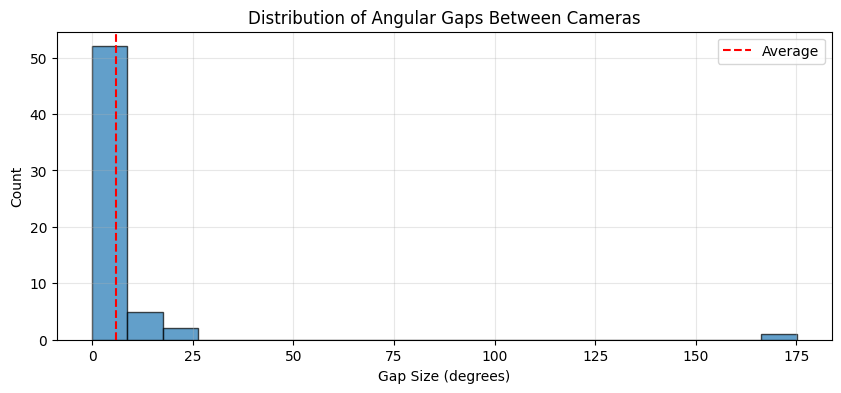

In [5]:
# Analyze coverage gaps
gaps = analyzer.analyze_coverage_gaps()

# Create DataFrame
gaps_df = pd.DataFrame(gaps)

print("Coverage Gap Analysis:")
print("="*50)
print(f"Average gap: {np.mean(gaps_df['gap_degrees']):.1f}°")
print(f"Ideal gap for {len(metrics)} cameras: {360/len(metrics):.1f}°")
print(f"\nLargest gaps:")
display(gaps_df.head(10))

# Plot gap distribution
plt.figure(figsize=(10, 4))
plt.hist(gaps_df['gap_degrees'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(gaps_df['gap_degrees']), color='red', linestyle='--', label='Average')
plt.xlabel('Gap Size (degrees)')
plt.ylabel('Count')
plt.title('Distribution of Angular Gaps Between Cameras')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Interactive Camera Subset Selection

In [6]:
# Create interactive widget for subset selection
%matplotlib inline

def visualize_subset(num_cameras, show_labels=True):
    """Visualize a camera subset selection."""
    suggestions = analyzer.suggest_optimal_subsets([num_cameras])
    
    if num_cameras not in suggestions:
        print(f"Cannot create subset of {num_cameras} cameras")
        return
    
    subset = suggestions[num_cameras]
    selected_cams = subset['cameras']
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Top-down view
    ax1 = axes[0]
    for cam_id, m in metrics.items():
        pos = m['position']
        if cam_id in selected_cams:
            ax1.scatter(pos[0], pos[1], color='red', s=100, alpha=0.8)
            if show_labels:
                ax1.annotate(str(cam_id), (pos[0], pos[1]), fontsize=8, fontweight='bold')
        else:
            ax1.scatter(pos[0], pos[1], color='lightgray', s=30, alpha=0.3)
    
    ax1.scatter(0, 0, color='blue', s=200, marker='*')
    ax1.set_xlabel('X (m)')
    ax1.set_ylabel('Y (m)')
    ax1.set_title('Top-Down View')
    ax1.axis('equal')
    ax1.grid(True, alpha=0.3)
    
    # 2. Polar view
    ax2 = plt.subplot(132, projection='polar')
    for cam_id, m in metrics.items():
        if cam_id in selected_cams:
            ax2.scatter(m['azimuth_rad'], m['distance'], color='red', s=100, alpha=0.8)
            if show_labels:
                ax2.annotate(str(cam_id), (m['azimuth_rad'], m['distance']), 
                           fontsize=8, fontweight='bold')
        else:
            ax2.scatter(m['azimuth_rad'], m['distance'], color='lightgray', s=30, alpha=0.3)
    ax2.set_title('Angular Distribution')
    
    # 3. Metrics display
    ax3 = axes[2]
    ax3.axis('off')
    
    # Display metrics as text
    metrics_text = f"""Camera Subset Metrics
    {'='*25}
    Cameras: {num_cameras}
    Selected IDs: {selected_cams}
    
    Coverage Metrics:
    - Average gap: {subset['avg_gap']:.1f}°
    - Max gap: {subset['max_gap']:.1f}°
    - Min gap: {subset['min_gap']:.1f}°
    - Gap std: {subset['gap_std']:.1f}°
    
    Quality Score: {subset['quality_score']:.1f}/100
    
    Storage Estimates:
    - Per subject: {subset['storage_per_subject_gb']:.1f} GB
    - 500 subjects: {subset['storage_500_subjects_gb']:.0f} GB
    """
    
    ax3.text(0.1, 0.5, metrics_text, transform=ax3.transAxes, 
            fontsize=10, verticalalignment='center', fontfamily='monospace')
    
    plt.suptitle(f'Camera Subset Visualization - {num_cameras} Cameras', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return selected_cams

# Create interactive widget
camera_slider = widgets.IntSlider(
    value=12,
    min=4,
    max=20,
    step=2,
    description='Cameras:',
    continuous_update=False
)

labels_checkbox = widgets.Checkbox(
    value=True,
    description='Show Labels'
)

widgets.interact(visualize_subset, num_cameras=camera_slider, show_labels=labels_checkbox);

interactive(children=(IntSlider(value=12, continuous_update=False, description='Cameras:', max=20, min=4, step…

## 7. Generate Custom Configuration

In [ ]:
# def generate_config_yaml(num_cameras):
#     """Generate config.yaml snippet for a specific camera count."""
#     suggestions = analyzer.suggest_optimal_subsets([num_cameras])
    
#     if num_cameras not in suggestions:
#         print(f"Cannot generate config for {num_cameras} cameras")
#         return
    
#     selected_cameras = suggestions[num_cameras]['cameras']
    
#     config = f"""# Configuration for {num_cameras} cameras in s3_all
# # Quality Score: {suggestions[num_cameras]['quality_score']:.1f}/100
# # Storage: {suggestions[num_cameras]['storage_per_subject_gb']:.1f} GB per subject
# # Total for 500 subjects: {suggestions[num_cameras]['storage_500_subjects_gb']:.0f} GB

# extraction:
#   # Camera selection for s3_all
#   cameras: {selected_cameras}
  
#   # Extract only s3_all with these cameras
#   performances:
#     - "s3_all"
  
#   # Data modalities to extract
#   modalities:
#     - "metadata"
#     - "calibration"
#     - "images"
#     - "audio"

# # For single-view performances, run separately with:
# # cameras: [25]
# # performances: ["s1_all", "s2_all", "s4_all", "s5_all", "s6_all"]
# """
    
#     print(config)
    
#     # Also save to file
#     output_file = f"config_s3all_{num_cameras}_cameras.yaml"
#     with open(output_file, 'w') as f:
#         f.write(config)
#     print(f"\nConfiguration saved to: {output_file}")

# # Interactive widget for config generation
# config_slider = widgets.IntSlider(
#     value=12,
#     min=4,
#     max=20,
#     step=2,
#     description='Cameras:',
#     style={'description_width': 'initial'}
# )

# button = widgets.Button(description="Generate Config")
# output = widgets.Output()

# def on_button_clicked(b):
#     with output:
#         output.clear_output()
#         generate_config_yaml(config_slider.value)

# button.on_click(on_button_clicked)

# display(widgets.VBox([config_slider, button, output]))

## 8. Export Analysis Results

In [ ]:
# # Export all camera positions to CSV
# output_dir = Path('/ssd2/zhuoyuan/renderme360_temp/download_all/visualizations/camera_analysis')
# output_dir.mkdir(parents=True, exist_ok=True)

# # Save camera metrics
# metrics_df.to_csv(output_dir / 'camera_metrics.csv', index=False)
# print(f"Camera metrics saved to: {output_dir / 'camera_metrics.csv'}")

# # Save gap analysis
# gaps_df.to_csv(output_dir / 'coverage_gaps.csv', index=False)
# print(f"Coverage gaps saved to: {output_dir / 'coverage_gaps.csv'}")

# # Save subset recommendations
# comparison_df.to_csv(output_dir / 'subset_recommendations.csv', index=False)
# print(f"Subset recommendations saved to: {output_dir / 'subset_recommendations.csv'}")

# print("\nAll analysis results exported successfully!")

Camera metrics saved to: /ssd2/zhuoyuan/renderme360_temp/download_all/visualizations/camera_analysis/camera_metrics.csv
Coverage gaps saved to: /ssd2/zhuoyuan/renderme360_temp/download_all/visualizations/camera_analysis/coverage_gaps.csv
Subset recommendations saved to: /ssd2/zhuoyuan/renderme360_temp/download_all/visualizations/camera_analysis/subset_recommendations.csv

All analysis results exported successfully!


## Summary

This notebook provides interactive tools for:
1. Analyzing camera positions and coverage
2. Testing different subset configurations
3. Generating configuration files
4. Visualizing camera arrangements

### Key Findings:
- All subjects have the same 38 cameras in s3_all
- Camera distribution has some irregularities (large gaps)
- 12 cameras provides good balance of quality and storage
- Different subset sizes suit different research needs

### Next Steps:
1. Choose appropriate subset size based on storage constraints
2. Update config.yaml with selected cameras
3. Run extraction for remaining subjects
4. Monitor storage usage during extraction